In [31]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
from time import sleep
from IPython.display import clear_output
import warnings

In [32]:
warnings.filterwarnings('ignore')

### Q-Learning Q-Table Initialization

In Q-learning, the algorithm maintains a Q-table, which is a matrix that maps state-action pairs to their respective Q-values. The Q-value represents the expected cumulative future rewards of taking a particular action in a specific state.

#### Function Explanation:

- **Function Name:** `initialize_q_table`
  
- **Parameters:**
  - `env: gym.Env` - This parameter is an instance of the OpenAI Gym environment (`gym.Env`) that the Q-learning algorithm will interact with. It provides information about the environment, such as the number of possible states and actions.

- **Return Type:**
  - `np.ndarray` - The function returns a NumPy array representing the Q-table.


In [2]:
def initiazlize_q_table(env : gym.Env) -> np.ndarray:
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    return q_table

### Q-Learning Start State Retrieval

In Q-learning, the start state is the initial state from which the agent begins its interaction with the environment. The function `get_start_state` is designed to retrieve this start state from an OpenAI Gym environment.

#### Function Explanation:

- **Function Name:** `get_start_state`
  
- **Parameters:**
  - `env: gym.Env` - This parameter is an instance of the OpenAI Gym environment (`gym.Env`) that the Q-learning algorithm will interact with. The environment is expected to support the `reset` method.

- **Return Type:**
  - `int` - The function returns an integer representing the start state.

In [3]:
def get_start_state(env : gym.Env) -> int:
    return env.reset()[0]

### Q-Learning Action Selection with Epsilon-Greedy Strategy

In Q-learning, the agent must decide which action to take in a given state. The `get_next_action` function implements an epsilon-greedy strategy for action selection, allowing the algorithm to balance exploration and exploitation. The condition checks if a randomly generated number between 0 and 1 is less than the specified epsilon value. If true, the agent chooses to explore by selecting a random action from the action space using `env.action_space.sample()`. If the condition is false, the agent chooses exploitation. It selects the action with the highest Q-value for the current state using `np.argmax(q_table[state])`. 

#### Function Explanation:

- **Function Name:** `get_next_action`
  
- **Parameters:**
  - `q_table: np.ndarray` - A NumPy array representing the Q-table, mapping state-action pairs to their Q-values.
  - `state: int` - The current state of the agent in the environment.
  - `env: gym.Env` - An instance of the OpenAI Gym environment that the Q-learning algorithm is interacting with.
  - `epsilon: float` - A hyperparameter representing the exploration-exploitation trade-off. It determines the probability of choosing a random action (`exploration`) versus choosing the action with the highest Q-value (`exploitation`).

- **Return Type:**
  - `int` - The function returns an integer representing the selected action.

- **epsilon**
  - Default Value: In my implementation, the default value for epsilon is set to `0.1`. I chose to focus on the exploitation.
  - Impact: A higher epsilon encourages more exploration, allowing the agent to discover new actions and potentially improve its policy. On the other hand, a lower epsilon favors exploitation, where the agent relies more on its current knowledge.
  - Exploration-Exploitation Trade-off: Adjusting the epsilon value is crucial for balancing the exploration-exploitation trade-off. Too much exploration may lead to slow convergence, while too much exploitation may result in the agent missing optimal actions.

In [4]:
def get_next_action(q_table : np.ndarray, state : int, env : gym.Env, epsilon : float) -> int:
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(q_table[state])
    return action

### Q-Learning Environment Interaction: Taking the Next Step

The `take_next_step` function is responsible for the interaction between the Q-learning agent and the environment. It performs a step in the environment based on the chosen action and returns information about the resulting state, the reward received, and whether the episode is completed.

#### Function Explanation:

- **Function Name:** `take_next_step`
  
- **Parameters:**
  - `env: gym.Env` - An instance of the OpenAI Gym environment that the Q-learning algorithm is interacting with.
  - `action: int` - An integer representing the action that the agent intends to take in the environment.

In [5]:
def take_next_step(env : gym.Env, action : int) -> (int, int, bool):
    next_state, reward, done, _, _ = env.step(action)
    return (next_state, reward, done)

### Q-Learning Q-Table Update

The `update_q_table` function is responsible for updating the Q-values in the Q-table based on the Q-learning update rule. It incorporates the immediate reward, the maximum Q-value of the next state, and the current estimate of the Q-value for the chosen action.

#### Function Explanation:

- **Function Name:** `update_q_table`
  
- **Parameters:**
  - `q_table: np.ndarray` - A NumPy array representing the Q-table, mapping state-action pairs to their Q-values.
  - `beta: float` - The learning rate parameter, influencing the step size of the Q-value updates.
  - `reward: int` - The immediate reward obtained from taking the chosen action in the current state.
  - `gamma: float` - The discount factor, representing the importance of future rewards in the Q-value update.
  - `state: int` - The current state of the agent in the environment.
  - `action: int` - The action chosen by the agent in the current state.
  - `next_state: int` - The next state resulting from taking the chosen action.

- **Return Type:**
  - `float` - The function returns the updated Q-value for the chosen state-action pair.

In [6]:
def update_q_table(q_table : np.ndarray, beta : float, reward : int, gamma : float, state : int, action : int, next_state : int) -> float:
    return beta * (reward + gamma * np.max(q_table[next_state]) - q_table[state, action])

### Q-Learning Game Visualization

The `visualize_game` function is designed to visualize the gameplay of the Q-learning agent in an OpenAI Gym environment. It uses the `render` method of the environment to obtain an image, displays it using Matplotlib, and includes relevant information such as the current reward, episode number, and time.

#### Function Explanation:

- **Function Name:** `visualize_game`
  
- **Parameters:**
  - `env: gym.Env` - An instance of the OpenAI Gym environment that the Q-learning agent is interacting with.
  - `stats: dict` - A dictionary containing statistics about the agent's performance, such as episode rewards.
  - `episode: int` - The current episode number.
  - `time: int` - The current time step within the episode.

- **Return Type:**
  - `None` - The function does not return a value but is used for visualization purposes.

In [7]:
def visualize_game(env : gym.Env, stats : dict, episode : int, time : int) -> None:
    img = env.render()
    plt.imshow(img)
    plt.title(f"Current reward: {stats['episode_rewards'][episode]}, Episode: {episode}, Time: {time}")
    plt.axis("off")
    plt.show()
    sleep(0.01)
    clear_output(wait=True)

### Q-Learning Algorithm Implementation

The `Q_learn` function represents the main implementation of the Q-learning algorithm. It iterates through episodes, interacting with the environment, updating the Q-table, and collecting statistics on the agent's performance.

#### Function Explanation:

- **Function Name:** `Q_learn`
  
- **Parameters:**
  - `env: gym.Env` - An instance of the OpenAI Gym environment that the Q-learning algorithm is interacting with.
  - `beta: float` - The learning rate parameter (default: 1.0), influencing the step size of the Q-value updates.
  - `gamma: float` - The discount factor (default: 0.9), representing the importance of future rewards in the Q-value update.
  - `epsilon: float` - The exploration-exploitation parameter (default: 0.1), determining the probability of choosing a random action.
  - `num_episodes: int` - The number of episodes for training (default: 1000).
  - `t_max: int` - The maximum number of time steps per episode (default: 100).
  - `visualize: bool` - A flag indicating whether to visualize the agent's gameplay during training (default: False).

- **Return Type:**
  - `(np.ndarray, dict)` - The function returns a tuple containing the final Q-table and a dictionary of statistics, including episode lengths and rewards.

In [58]:
def Q_learn(env : gym.Env, beta=1.0, gamma=0.9, epsilon=0.1, num_episodes=1000, t_max=100, visualize=False) -> (np.ndarray, dict):

    # initialize q table
    Q = initiazlize_q_table(env)

    # initialize stats
    stats = {'episode_lengths': np.zeros(num_episodes), 'episode_rewards': np.zeros(num_episodes)}

    for i_episode in range(num_episodes):

        # initialize start state
        state = get_start_state(env)

        for t in range(t_max):
            # get next action
            action = get_next_action(Q, state, env, epsilon)

            # take next step and retrive info about next state, if next state is terminal and reward
            next_state, reward, done = take_next_step(env, action)

            # update stats
            stats['episode_rewards'][i_episode] += reward
            stats['episode_lengths'][i_episode] = t

            # update q table
            Q[state, action] += update_q_table(Q, beta, reward, gamma, state, action, next_state)

            # update state
            state = next_state

            # visualize the game
            if visualize: visualize_game(env, stats, i_episode, t)

            # end of episode if reached terminal state
            if done: break

    return (Q, stats)

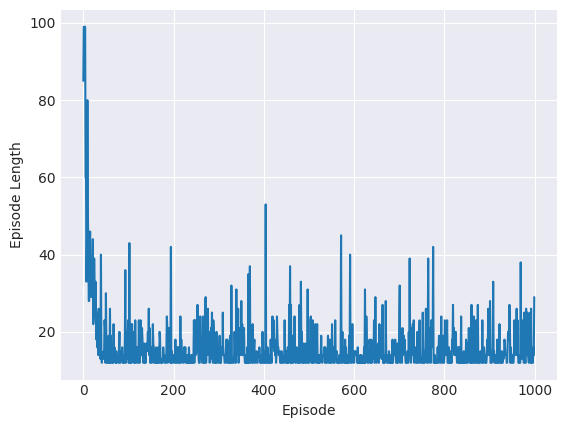

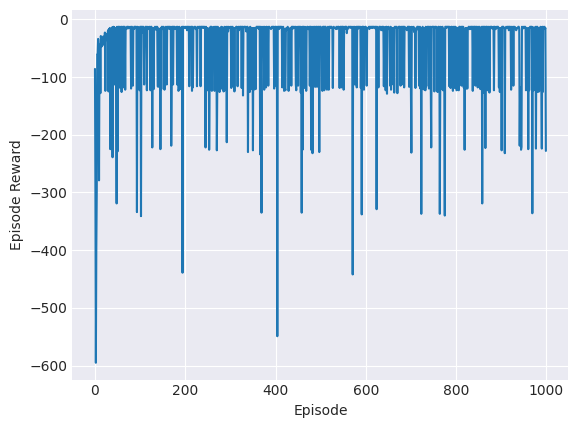

In [60]:
env = gym.make('CliffWalking-v0', render_mode='rgb_array')
env.reset()
Q, stats = Q_learn(env)
plt.plot(stats['episode_lengths'])
plt.xlabel('Episode')
plt.ylabel('Episode Length')
plt.show()

plt.plot(stats['episode_rewards'])
plt.xlabel('Episode')
plt.ylabel('Episode Reward')
plt.show()

In [52]:
def plot_beta_graphs():
    # Set a stylish plot style
    plt.style.use('seaborn-darkgrid')

    # Generate beta values
    beta = np.linspace(0.01, 2.0, 100)

    # Create subplots with a shared y-axis
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    avg_reward = []
    avg_path_length = []

    for b in beta:
        env = gym.make('CliffWalking-v0', render_mode='rgb_array')
        env.reset()
        Q, stats = Q_learn(env, beta=b)
        avg_reward.append(np.mean(stats['episode_rewards']))
        avg_path_length.append(np.mean(stats['episode_lengths']))

    # Plot Average Reward vs Beta
    ax[0].plot(beta, avg_reward, linewidth=2, label='Average Reward')
    max_reward_index = np.argmax(avg_reward)
    max_reward_beta = beta[max_reward_index]
    ax[0].scatter(max_reward_beta,
                  avg_reward[max_reward_index],
                  color='green',
                  s=100,
                  label=f'Best beta: {round(max_reward_beta, 2)}, (value: {round(avg_reward[max_reward_index], 2)})')
    ax[0].set_title('Average Reward (1000 episodes)')
    ax[0].set_xlabel('Beta')
    ax[0].set_ylabel('Average Reward')
    ax[0].axhline(y=-13, color='red', linestyle='--', label='Minimal Reward (value: -13)')
    ax[0].legend()
    ax[0].grid(True, linestyle='--', alpha=0.6)

    # Plot Average Path Length vs Beta
    ax[1].plot(beta, avg_path_length, linewidth=2, label='Average Path Length')
    min_path_length_index = np.argmin(avg_path_length)
    min_path_length_beta = beta[min_path_length_index]
    ax[1].scatter(min_path_length_beta,
                  avg_path_length[min_path_length_index],
                  color='green',
                  s=100,
                  label=f'Best beta: {round(min_path_length_beta, 2)}, (value: {round(avg_path_length[min_path_length_index], 2)})')
    ax[1].set_title('Average Path Length (1000 episodes)')
    ax[1].set_xlabel('Beta')
    ax[1].set_ylabel('Average Path Length')
    ax[1].axhline(y=12, color='red', linestyle='--', label='Minimal Path Length (value: 12)')
    ax[1].legend()
    ax[1].grid(True, linestyle='--', alpha=0.6)

    # Add a title to the overall plot
    plt.suptitle('Exploring Beta Values in Q-Learning', fontsize=16, y=1.02)

    # Fine-tune layout for better spacing
    plt.tight_layout()

    # Show the plot
    plt.show()

In [53]:
def plot_gamma_graphs():
    # Set a stylish plot style
    plt.style.use('seaborn-darkgrid')

    # Generate gamma values
    gamma = np.linspace(0.01, 2.0, 100)

    # Create subplots with a shared y-axis
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    avg_reward = []
    avg_path_length = []

    for g in gamma:
        env = gym.make('CliffWalking-v0', render_mode='rgb_array')
        env.reset()
        Q, stats = Q_learn(env, gamma=g)
        avg_reward.append(np.mean(stats['episode_rewards']))
        avg_path_length.append(np.mean(stats['episode_lengths']))

    # Plot Average Reward vs Gamma
    ax[0].plot(gamma, avg_reward, linewidth=2, label='Average Reward')
    max_reward_index = np.argmax(avg_reward)
    max_reward_gamma = gamma[max_reward_index]
    ax[0].scatter(max_reward_gamma,
                  avg_reward[max_reward_index],
                  color='green',
                  s=100,
                  label=f'Best gamma: {round(max_reward_gamma, 2)}, (value: {round(avg_reward[max_reward_index], 2)})')
    ax[0].set_title('Average Reward (1000 episodes)')
    ax[0].set_xlabel('Gamma')
    ax[0].set_ylabel('Average Reward')
    ax[0].axhline(y=-13, color='red', linestyle='--', label='Minimal Reward (value: -13)')
    ax[0].legend()
    ax[0].grid(True, linestyle='--', alpha=0.6)

    # Plot Average Path Length vs Gamma
    ax[1].plot(gamma, avg_path_length, linewidth=2, label='Average Path Length')
    min_path_length_index = np.argmin(avg_path_length)
    min_path_length_gamma = gamma[min_path_length_index]
    ax[1].scatter(min_path_length_gamma,
                  avg_path_length[min_path_length_index],
                  color='green',
                  s=100,
                  label=f'Best gamma: {round(min_path_length_gamma, 2)}, (value: {round(avg_path_length[min_path_length_index], 2)})')
    ax[1].set_title('Average Path Length (1000 episodes)')
    ax[1].set_xlabel('Gamma')
    ax[1].set_ylabel('Average Path Length')
    ax[1].axhline(y=12, color='red', linestyle='--', label='Minimal Path Length (value: 12)')
    ax[1].legend()
    ax[1].grid(True, linestyle='--', alpha=0.6)

    # Add a title to the overall plot
    plt.suptitle('Exploring Gamma Values in Q-Learning', fontsize=16, y=1.02)

    # Fine-tune layout for better spacing
    plt.tight_layout()

    # Show the plot
    plt.show()


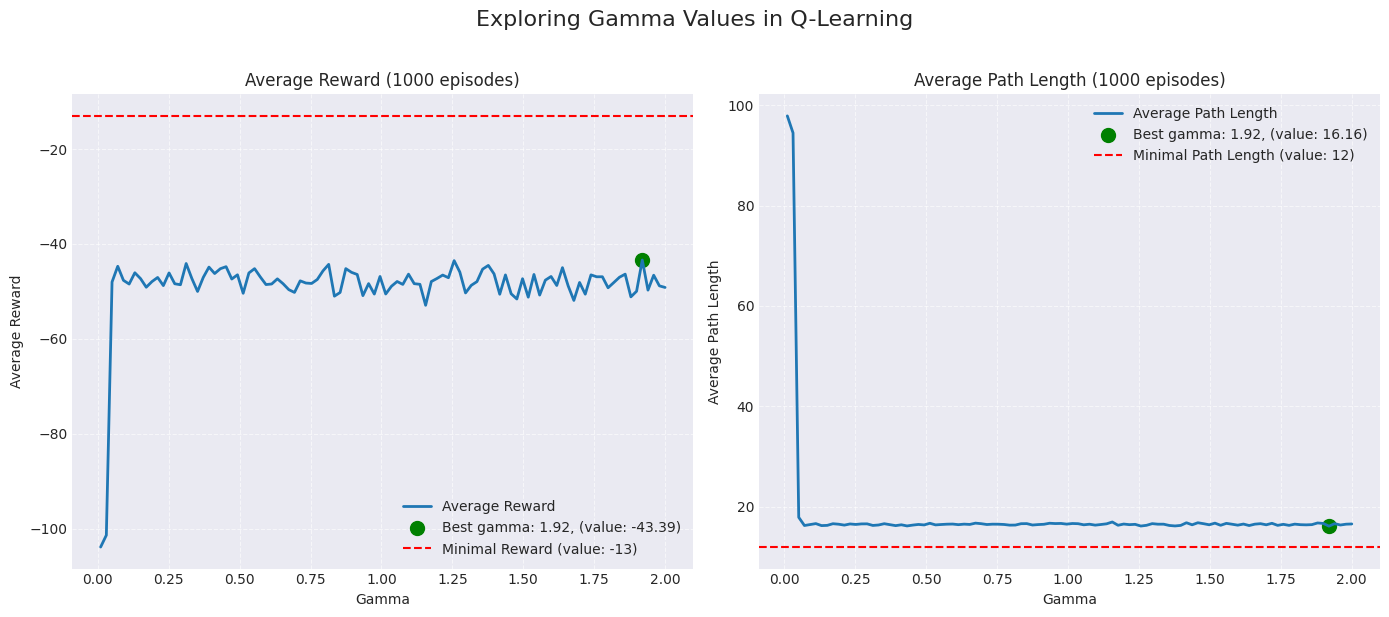

In [54]:
plot_gamma_graphs()

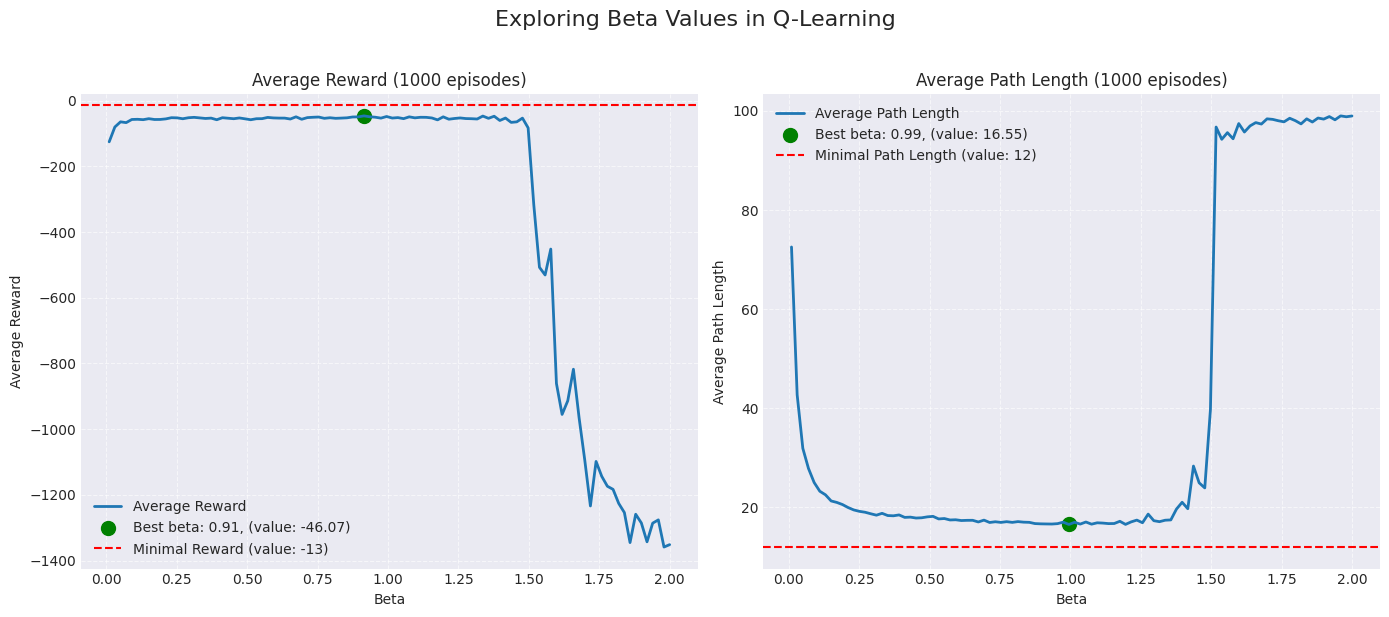

In [55]:
plot_beta_graphs()